In [ ]:
###Step 1: Import the reuqired modules that we need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


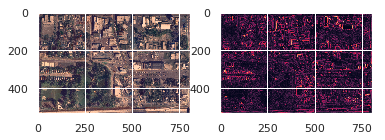

In [ ]:
###Step 2: Load the pic to 'gdrive/My Drive/' folder and read it

##Read Sugar House color arial image
SH = plt.imread('gdrive/My Drive/Imagery_Jiada/1971.png')
#SH = plt.imread('gdrive/My Drive/Imagery_Jiada/1985.png')

##Read SH black-white arial image
from skimage.color import rgb2gray
SH_grey = rgb2gray(SH)

##Load filter function sobel
from skimage.filters import sobel
import matplotlib.pyplot as plt

###Plot the colorized and uncoloried image
f, ax = plt.subplots(1,2)
ax[0].imshow(SH)
ax[1].imshow(sobel(SH_grey))


In [ ]:
####Step 3: Create three samping functions to Randomly collect at least 100 samples with 20-pixel x 20-pixel sub-samples of the aerial image in a dictionary data type

#the number of training samples you want for both classes
n_samples = 5

#generates a random pixel within the bounds of the image (based on big_sub_image)
rand_pixel = lambda: (np.random.randint(40, SH.shape[0]-60),
                      np.random.randint(40,SH.shape[1]-60))

#subslice the image
def sub_image(p1,p2):return SH[p1:p1+20,p2:p2+20,:]

#a bigger image for perspective
def big_sub_image(p1,p2):
  return SH[p1-40:p1+60,p2-40:p2+60,:]

#a plot of the 2 images for user input
def comparison_plot(tb,t):
  plt.close()
  f, ax = plt.subplots(1,2)
  ax[0].imshow(tb)
  for i in ((40,40),(40,60),(60,40),(60,60)):
    ax[0].scatter(i[0],i[1], marker = '+', color = 'r')
    ax[1].imshow(t)
    plt.show()
 

In [ ]:
###Step 4: Utilize the sampling functions above to get the sample images as 'training_data'

##create dictionary and list with 'pervious' and 'impervious' key
training_data = {}
training_data['pervious'] = []
training_data['impervious'] = []

##use 'sub_image' and 'big_sub_image' functions to append the resulting 20 x 20 'pervious' and 'impervious' Numpy arrays to the list
while len(training_data['pervious']) < n_samples or len(training_data['impervious']) < n_samples:
    p = rand_pixel()
    temp = sub_image(p[0],p[1])
    temp_big = big_sub_image(p[0],p[1])
    comparison_plot(temp_big,temp)

    label = int(input('1 = pervious, 0 = impervious, any other input: pass '))
    if label == 1:
        if len(training_data['pervious']) < n_samples:
            training_data['pervious'].append(temp)
    elif label == 0:
        if len(training_data['impervious']) < n_samples:
            training_data['impervious'].append(temp)
    else:
        pass
    clear_output()

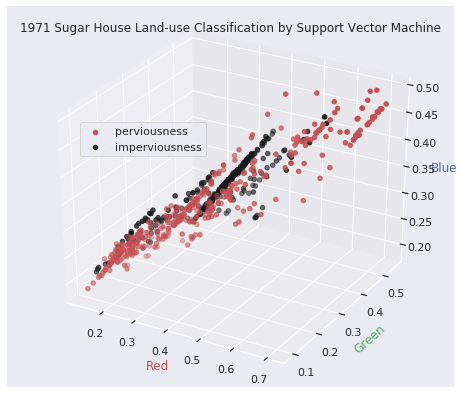

In [ ]:
### Step 5: Plot training data(one sample)
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw = dict(projection='3d'), figsize = [8,7])
ax.scatter3D(training_data['pervious'][0][:,:,0], 
             training_data['pervious'][0][:,:,1], 
             training_data['pervious'][0][:,:,2], 
             color = 'r',label = 'perviousness');
ax.scatter3D(training_data['impervious'][0][:,:,0], 
             training_data['impervious'][0][:,:,1], 
             training_data['impervious'][0][:,:,2], 
             color = 'k', label = 'imperviousness')
ax.set_xlabel('Red', color ='r')
ax.set_ylabel('Green', color ='g')
ax.set_zlabel('Blue', color ='b')
ax.legend(loc = 'upper left',bbox_to_anchor=(0.15,0.01,0.3,0.7))
ax.set_title('1971 Sugar House Land-use Classification by Support Vector Machine');

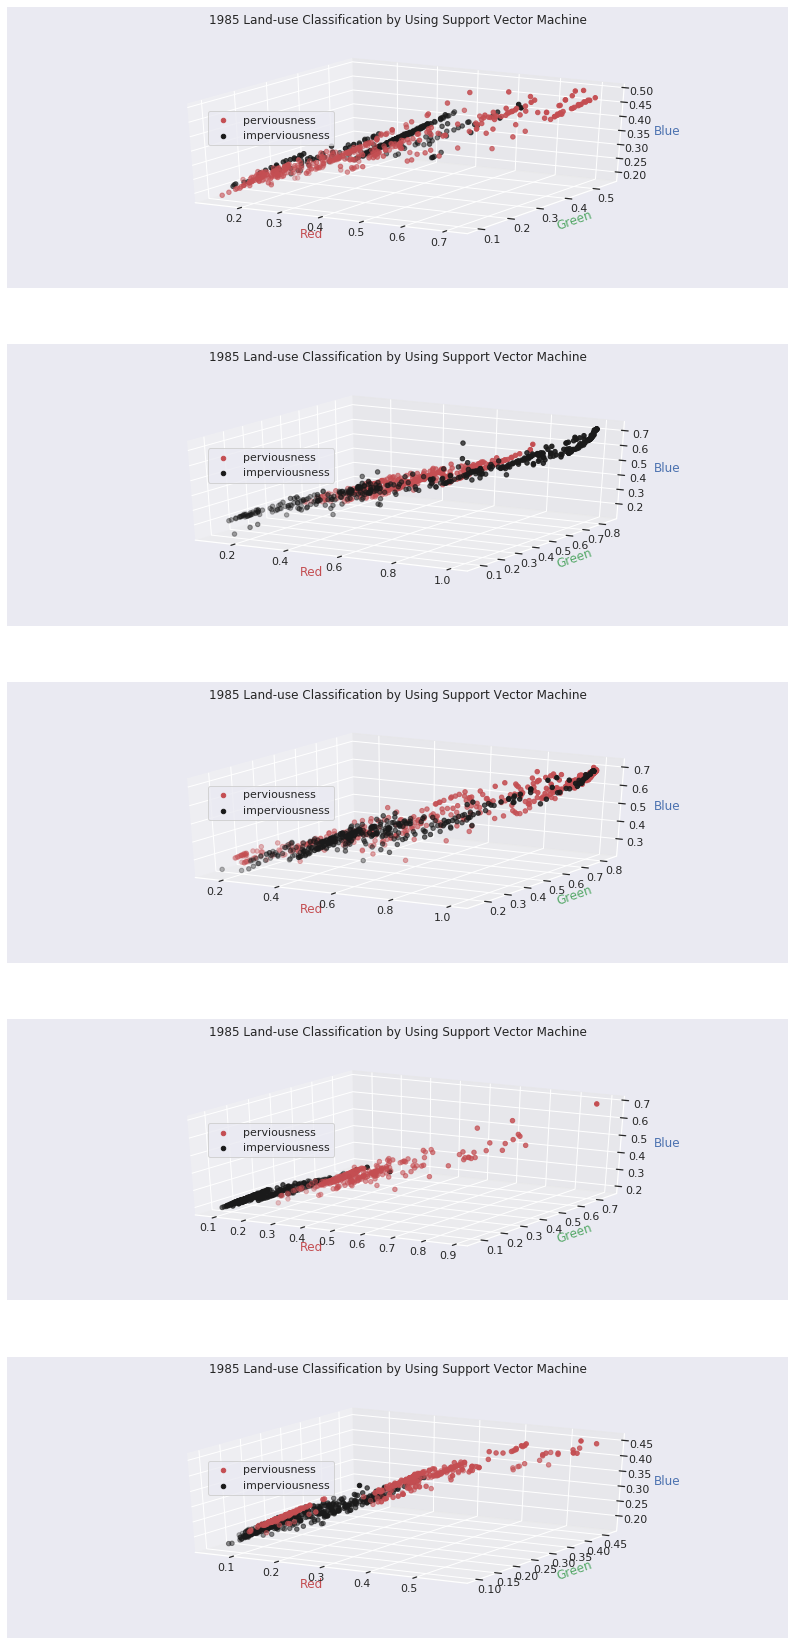

In [ ]:
###Step 6: take 4 samples each of pervious and impervious taing data  and plot thme

fig, ax = plt.subplots(5,1, subplot_kw = dict(projection='3d'), figsize = [14,30])

for i in range(5):
  ax[i].scatter3D(training_data['pervious'][i][:,:,0], 
                  training_data['pervious'][i][:,:,1], 
                  training_data['pervious'][i][:,:,2], 
                  color = 'r',label = 'perviousness');
  ax[i].scatter3D(training_data['impervious'][i][:,:,0], 
                  training_data['impervious'][i][:,:,1], 
                  training_data['impervious'][i][:,:,2], 
                  color = 'k',label = 'imperviousness');
  ax[i].set_xlabel('Red', color ='r')
  ax[i].set_ylabel('Green', color ='g')
  ax[i].set_zlabel('Blue', color ='b')
  ax[i].dist = 14 
  ax[i].xaxis.labelpad = 10
  ax[i].yaxis.labelpad = 10
  ax[i].zaxis.labelpad = 10
  ax[i].legend(loc = 'upper left',bbox_to_anchor=(0.25,0.05,0.5,0.6))
  ax[i].set_title('1985 Land-use Classification by Using Support Vector Machine');

In [ ]:
###Step 6: Convert these samples to the standard X, y matrix format that Scikit-Learn expects

## Before running train_test_split() you need to transform the train_data into the X and y format expected by Scikit Learn. This is exactly like the 'crack' 'no crack' data problem (see Class 19 Quiz Solutions, which are posted on Canvas)
## Class 19 Quiz: In the X feature matrix, each row should represent a single image. The values in each column will be the flattened (i.e. 1D) RGB pixel data.
## In the y target vector, each entry should correspond to whether or not the image represents a 'crack' or 'no crack' image. For now, let 'crack' = 1, and 'no crack' = 0. The index of the y vector should match the row index of X.


n_pervious=len(training_data['pervious'])
n_impervious = len(training_data['impervious'])
n_features = len(training_data['pervious'][0].flatten())

X=np.concatenate((
np.stack(training_data['pervious']).reshape(n_pervious, n_features),
np.stack(training_data['impervious']).reshape(n_impervious, n_features)))

y= np.concatenate((np.ones(n_pervious), np.zeros(n_impervious)))

In [ ]:
###Step 7: Divide your data in to training and testing sets with a 25% test size                
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [ ]:
###Step 8: Import the python modules for Machine learning model

import numpy as np
from scipy import stats
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
###Step 9: Creat Support Vector Machine model

##using PCA as a pre-processing step, with any number of principal components
pca = PCA(n_components=100, whiten=True, random_state=42)

##create support vector machine classifier estimator
svc = SVC(kernel='rbf', class_weight='balanced')

##Use pipeline algorithm to improve the rf model as a pipeline model
model = make_pipeline(pca,svc)

#Check the parameters that the model has
model.get_params().keys() 

dict_keys(['memory', 'steps', 'verbose', 'pca', 'svc', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'svc__C', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [ ]:
###Step 10: Use GridSearchCV() to find the optimal RandomForestClassifier() using 5-fold cross validation
from sklearn.model_selection import GridSearchCV
param_grid = {'pca__n_components': [1,4],
              'svc__C': [1, 5],
              'svc__gamma': [0.000001, 0.000009, 0.00001, 0.009]}
grid = GridSearchCV(model, param_grid)


In [ ]:
###Step 11:Fit the model and make prediction both imperviousness and perviousness                             
grid.fit(Xtrain, ytrain) 
model= grid.best_estimator_
ypredict=model.predict(Xtest)

##Make the pixel sampling cover all areas of each sub-image
for i in zip(range(0,SH.shape[0]-20,1),range(0,SH.shape[1]-20,1)):
    grid.best_estimator_.predict(sub_image(i[0],i[1]).reshape(1,1600))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
###Step 12: Check the peformance report of RF estimator for  classification
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.classification_report(ypredict, ytest))


              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


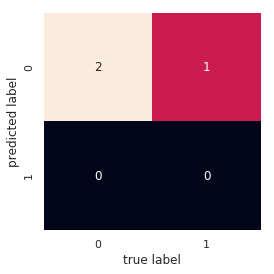

In [ ]:
###Step 13: plot the confusion matrix for model performance evaluation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypredict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
###Step 14: Calculate the ratio of imperviousness

perviousness = np.sum(training_data['pervious'])
#print(perviousness)

imperviousness = np.sum(training_data['impervious'])
#print(imperviousness)

ratio = imperviousness/(perviousness+imperviousness)
ratio

0.48131654